
- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [36]:
import pandas as pd
import numpy as np
import os
import ast
import json
import re
from pprint import pprint
from pandas import json_normalize
import quandl

In [37]:
# load one file first to see what type of data you're dealing with and what attributes it has

In [38]:


# Specify the directory you want to explore
directory = '/Users/jorgen/Documents/LHL/Supervised-Learning-main/data'

# Use os.listdir to get files
files = os.listdir(directory)

# Print all files
for file in files:
    print(file)

PA_Harrisburg_0.json
LA_BatonRouge_2.json
MO_JeffersonCity_0.json
TN_Nashville_2.json
MD_Annapolis_4.json
NM_SantaFe_3.json
AZ_Phoenix_0.json
KY_Frankfort_4.json
CO_Denver_1.json
FL_Tallahassee_3.json
MI_Lansing_2.json
AR_LittleRock_0.json
ME_Augusta_4.json
GA_Atlanta_4.json
IN_Indianapolis_0.json
MN_St.Paul_4.json
MA_Boston_1.json
WI_Madison_1.json
NE_Lincoln_4.json
AL_Montgomery_4.json
CA_Sacramento_1.json
IA_DesMoines_1.json
AK_Juneau_0.json
OK_OklahomaCity_0.json
NC_Raleigh_0.json
NH_Concord_0.json
DE_Dover_1.json
MT_Helena_1.json
MS_Jackson_0.json
MT_Helena_0.json
MS_Jackson_1.json
RI_Providence_4.json
NH_Concord_1.json
CT_Hartford_4.json
DE_Dover_0.json
NC_Raleigh_1.json
AK_Juneau_1.json
OK_OklahomaCity_1.json
IA_DesMoines_0.json
NY_Albany_4.json
WY_Cheyenne_4.json
CA_Sacramento_0.json
WI_Madison_0.json
MA_Boston_0.json
IL_Springfield_4.json
IN_Indianapolis_1.json
AR_LittleRock_1.json
VT_Montpelier_4.json
CO_Denver_0.json
FL_Tallahassee_2.json
MI_Lansing_3.json
WA_Olympia_4.json


In [39]:
import json
from pprint import pprint

# Path to the JSON file
file_path = '/Users/jorgen/Documents/LHL/Supervised-Learning-main/data/AZ_Phoenix_2.json'

# Load and inspect the content of the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)
    pprint(data)  # Pretty print the JSON data to inspect its structure

{'data': {'count': 42,
          'results': [{'branding': [{'name': 'My Home Group Real Estate',
                                     'photo': None,
                                     'type': 'Office'}],
                       'community': None,
                       'description': {'baths': 5,
                                       'baths_1qtr': None,
                                       'baths_3qtr': None,
                                       'baths_full': 5,
                                       'baths_half': None,
                                       'beds': 5,
                                       'garage': 3,
                                       'lot_sqft': 12197,
                                       'name': None,
                                       'sold_date': '2024-01-08',
                                       'sold_price': 1206000,
                                       'sqft': 4408,
                                       'stories': 2,
                     

At this point, ensure that you have all sales in a dataframe.
- Is each cell one value, or do some cells have lists?
- Maybe the "tags" will help create some features.
- What are the data types of each column?
- Some sales may not actually include the sale price.  These rows should be dropped.
- Some sales don't include the property type.
- There are a lot of None values.  Should these be dropped or replaced with something?

In [40]:
# Directory containing the JSON files
directory = '/Users/jorgen/Documents/LHL/Supervised-Learning-main/data'

# List to hold each DataFrame
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):  # Ensure processing only JSON files
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            # Check if the 'sales' key exists in the JSON data
            if 'sales' in data:
                df = pd.json_normalize(data, record_path=['sales'])
            else:
                # If 'sales' is not a key, perhaps normalize the entire JSON or another part
                df = pd.json_normalize(data)  # Adjust this according to your JSON structure
            dfs.append(df)

# Concatenate all dataframes into one
all_sales_df = pd.concat(dfs, ignore_index=True)

In [41]:
# Reading the CSV data from the specified path into pandas DataFrame `X_train`
X_train = pd.read_csv('/Users/jorgen/Documents/LHL/Supervised-Learning-main/dataframe.csv')

# Iterating over each column present in the DataFrame
for column in X_train.columns:
    # Using the `apply` function to go through each cell in the column.
    # Apply function takes a lambda function which checks if the cell content is a list.
    # `any()` method checks if there is any cell in the column that satisfies the condition.
    has_list = X_train[column].apply(lambda x: isinstance(x, list)).any()

    # If a list is found in the column (i.e., if `has_list` is `True`),
    # then print the column name.
    if has_list:
        print(f"Column '{column}' contains a list")

In [42]:
# If a 'tags' column exists, try printing out unique set of tags
if 'tags' in X_train.columns:
    unique_tags = set(tag for tags in X_train['tags'].dropna() for tag in tags)
    print(f"Unique tags: {unique_tags}")

In [43]:
# Print types of each column
print(X_train.dtypes)

status     int64
data      object
dtype: object


In [44]:
# Check if a 'sale_price' column exists and if it contains NaN values
if 'sale_price' in X_train.columns:
    print(f"Number of rows before drop: {len(X_train)}")
    X_train = X_train.dropna(subset=['sale_price'])
    print(f"Number of rows after drop: {len(X_train)}")

In [45]:
# Check if a 'property_type' column exists and if it contains NaN values
if 'property_type' in X_train.columns:
    property_type_nan_count = X_train['property_type'].isna().sum()
    print(f"Number of rows without property_type: {property_type_nan_count}")

In [46]:
# Count the number of None values per column
none_count = X_train.isnull().sum()
print(none_count)

status    0
data      0
dtype: int64


In [47]:
# load and concatenate data here
# drop or replace values as necessary

In [48]:
data_folder = '/Users/jorgen/Documents/LHL/Supervised-Learning-main/data'
json_files = [pos_json for pos_json in os.listdir(data_folder) if pos_json.endswith('.json')]

data_frames = []  # Collate all the DataFrames here

# Load each JSON file and convert it to pandas DataFrame
for file in json_files:
    file_path = os.path.join(data_folder, file)
    with open(file_path, 'r') as json_file:
        json_data = json.load(json_file)
        if isinstance(json_data, dict):
            # Flatten nested dictionary structures if 'data' is a dictionary
            json_df = json_normalize(json_data)
        else:
            # 'data' is not a dict, so it should be a list or scalar
            if isinstance(json_data, list):
                # Flatten list of dictionaries if 'data' is a list
                json_df = json_normalize(json_data)
            else:
                # 'data' is a scalar, so convert it into a DataFrame
                json_df = pd.DataFrame(data=[json_data], columns=['data'])
        data_frames.append(json_df)

# Concatenate all DataFrames
df = pd.concat(data_frames, ignore_index=True)

# Show the first few rows of the DataFrame
print(df.head())

   status  data.total  data.count  \
0     200         648          42   
1     200          48          42   
2     200          21          21   
3     200          18          16   
4     200         442          42   

                                        data.results  
0  [{'primary_photo': {'href': 'https://ap.rdcpix...  
1  [{'primary_photo': {'href': 'https://ap.rdcpix...  
2  [{'primary_photo': {'href': 'https://ap.rdcpix...  
3  [{'primary_photo': {'href': 'https://ap.rdcpix...  
4  [{'primary_photo': {'href': 'https://ap.rdcpix...  


In [49]:
# 'Explode' the column of lists into separate rows
exploded_df = df.explode('data.results')

# Now, 'data.results' is a single dictionary per row,
# so we can convert these dictionaries into separate columns
results_df = exploded_df['data.results'].apply(pd.Series)

# Concatenate the original DataFrame with the new 'results' DataFrame
flattened_df = pd.concat([exploded_df, results_df], axis=1)

# We don't need 'data.results' anymore as its content is now in separate columns
flattened_df = flattened_df.drop(columns=['data.results'])

# Show the first few rows of the new DataFrame
print(flattened_df.head())

  status  data.total  data.count  \
0    200         648          42   
0    200         648          42   
0    200         648          42   
0    200         648          42   
0    200         648          42   

                                       primary_photo      last_update_date  \
0  {'href': 'https://ap.rdcpix.com/8c0b391ae4f9bb...  2024-01-17T00:01:55Z   
0  {'href': 'https://ap.rdcpix.com/40c55dc5d4e29a...  2024-01-16T16:49:36Z   
0  {'href': 'https://ap.rdcpix.com/497a833c1c423b...  2024-01-13T00:03:39Z   
0  {'href': 'https://ap.rdcpix.com/ade15664a2e839...  2024-01-16T07:48:30Z   
0  {'href': 'https://ap.rdcpix.com/a5dada323a7e61...  2024-01-13T00:01:45Z   

                                              source  \
0  {'plan_id': None, 'agents': [{'office_name': N...   
0  {'plan_id': None, 'agents': [{'office_name': N...   
0  {'plan_id': None, 'agents': [{'office_name': N...   
0  {'plan_id': None, 'agents': [{'office_name': N...   
0  {'plan_id': None, 'agents': [{'

In [50]:
# Handle the 'location' column
location_df = flattened_df['location'].apply(pd.Series)

# If 'location' is a nested dictionary, we can flatten it further
address_df = location_df['address'].apply(pd.Series)

# Now, we concatenate the original DataFrame with the 'location' DataFrame and 'address' DataFrame
full_df = pd.concat([flattened_df, location_df, address_df], axis=1)

# Drop the original 'location' and 'address' columns
full_df = full_df.drop(columns=['location', 'address'])

# Show the first few rows
print(full_df.head())

  status  data.total  data.count  \
0    200         648          42   
0    200         648          42   
0    200         648          42   
0    200         648          42   
0    200         648          42   

                                       primary_photo      last_update_date  \
0  {'href': 'https://ap.rdcpix.com/8c0b391ae4f9bb...  2024-01-17T00:01:55Z   
0  {'href': 'https://ap.rdcpix.com/40c55dc5d4e29a...  2024-01-16T16:49:36Z   
0  {'href': 'https://ap.rdcpix.com/497a833c1c423b...  2024-01-13T00:03:39Z   
0  {'href': 'https://ap.rdcpix.com/ade15664a2e839...  2024-01-16T07:48:30Z   
0  {'href': 'https://ap.rdcpix.com/a5dada323a7e61...  2024-01-13T00:01:45Z   

                                              source  \
0  {'plan_id': None, 'agents': [{'office_name': N...   
0  {'plan_id': None, 'agents': [{'office_name': N...   
0  {'plan_id': None, 'agents': [{'office_name': N...   
0  {'plan_id': None, 'agents': [{'office_name': N...   
0  {'plan_id': None, 'agents': [{'

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [51]:
# OHE categorical variables here
# tags will have to be done manually

In [52]:
num_city_cols = full_df['city'].nunique()
num_state_cols = full_df['state'].nunique()

In [53]:
all_tags = set(tag for tags in full_df['tags'] if isinstance(tags, list) for tag in tags)
num_tag_cols = len(all_tags)

tag_freq = {}
for tags_list in full_df['tags']:
    if isinstance(tags_list, list):
        for tag in tags_list:
            if tag not in tag_freq:
                tag_freq[tag] = 0
            tag_freq[tag] += 1

high_freq_tags = {tag for tag, freq in tag_freq.items() if freq > 5}
num_high_freq_tags = len(high_freq_tags)

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE such as using central tendency?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- If you replace cities or states with numerical values, make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Drop columns that aren't needed.
- Don't keep the list price because it will be too close to the sale price.

# perform train test split here
# do something with state and city
# drop any other not needed columns

In [54]:
#Splitting the data into Train and Test

from sklearn.model_selection import train_test_split

X = full_df.drop('list_price', axis=1)  # dropping the 'list_price' column as mentioned
y = full_df['list_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(X_train.columns)

Index([              'status',           'data.total',           'data.count',
              'primary_photo',     'last_update_date',               'source',
                       'tags',            'permalink',               'status',
                  'list_date',          'open_houses',          'description',
                   'branding',      'lead_attributes',          'property_id',
                     'photos',                'flags',            'community',
                   'products',        'virtual_tours',       'other_listings',
                 'listing_id', 'price_reduced_amount',           'matterport',
                            0,      'street_view_url',               'county',
                            0,          'postal_code',                'state',
                 'coordinate',                 'city',           'state_code',
                       'line',                      0],
      dtype='object')


In [56]:
X_train

,status,data.total,data.count,primary_photo,last_update_date,source,tags,permalink,status,list_date,...,street_view_url,county,0,postal_code,state,coordinate,city,state_code,line,0
115,200,34,33,None,2023-12-19T18:38:05Z,"{'plan_id': None, 'agents': [{'office_name': N...","[central_air, central_heat, dishwasher, firepl...",113-Tryon-St_Columbia_SC_29201_M57384-62778,sold,2023-12-20T00:09:17.000000Z,...,https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': '45079', 'name': 'Richland'}",NaN,29201,South Carolina,"{'lon': -81.039568, 'lat': 33.983242}",Columbia,SC,113 Tryon St,NaN
61,200,687,42,{'href': 'https://ap.rdcpix.com/5541f6aaf6315b...,2024-01-16T19:18:43Z,"{'plan_id': None, 'agents': [{'office_name': '...","[central_air, city_view, den_or_office, dishwa...",1901-Chloe-Ln_Lincoln_NE_68512_M85110-74482,sold,2023-11-15T22:57:05.000000Z,...,https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': '31109', 'name': 'Lancaster'}",NaN,68512,Nebraska,"{'lon': -96.695514, 'lat': 40.732244}",Lincoln,NE,1901 Chloe Ln,NaN
124,200,338,42,{'href': 'https://ap.rdcpix.com/3ca59dfc2d3a59...,2023-12-31T06:44:41Z,"{'plan_id': None, 'agents': [{'office_name': N...","[laundry_room, basement, two_or_more_stories, ...",385-Woodland-St-Apt-2A_Hartford_CT_06112_M3433...,sold,2023-08-26T01:40:10.000000Z,...,https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': '09003', 'name': 'Hartford'}",NaN,06112,Connecticut,"{'lon': -72.697601, 'lat': 41.780109}",Hartford,CT,385 Woodland St Apt 2A,NaN
107,200,675,42,{'href': 'https://ap.rdcpix.com/9607c106e6edc7...,2024-01-04T14:09:56Z,"{'plan_id': None, 'agents': [{'office_name': N...","[central_heat, forced_air, view, basement, two...",38-Victor-Emanuel-Ave_Providence_RI_02904_M340...,sold,2024-01-02T18:50:21.000000Z,...,https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': '44007', 'name': 'Providence'}",NaN,02904,Rhode Island,"{'lon': -71.427261, 'lat': 41.860146}",Providence,RI,38 Victor Emanuel Ave,NaN
11,200,1264,42,{'href': 'https://ap.rdcpix.com/54a3612ad3e6cf...,2024-01-12T20:33:05Z,"{'plan_id': None, 'agents': [{'office_name': '...","[carport, hardwood_floors, single_story, grani...",10812-W-David-O-Dodd-Rd_Little-Rock_AR_72204_M...,sold,2023-06-15T13:53:07.000000Z,...,https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': '05119', 'name': 'Pulaski'}",NaN,72204,Arkansas,"{'lon': -92.39731, 'lat': 34.692718}",Little Rock,AR,10812 W David O Dodd Rd,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,200,1811,42,{'href': 'https://ap.rdcpix.com/94e15d7e165b35...,2024-01-16T18:49:04Z,"{'plan_id': None, 'agents': [{'office_name': N...","[community_outdoor_space, community_security_f...",1014-LA-Von-Dr_Richmond_VA_23227_M69950-00718,sold,2023-12-15T21:48:32.000000Z,...,https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': '51087', 'name': 'Henrico'}",NaN,23227,Virginia,"{'lon': -77.456186, 'lat': 37.623401}",Henrico,VA,1014 LA Von Dr,NaN
166,200,252,42,{'href': 'https://ap.rdcpix.com/061596ef99c2a2...,2023-12-04T10:19:57Z,"{'plan_id': None, 'agents': [{'office_name': '...","[carport, city_view, view, single_story, corne...",344-Farmers-Ln_Frankfort_KY_40601_M30199-04482,sold,2023-07-17T20:12:55.000000Z,...,https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': '21073', 'name': 'Franklin'}",NaN,40601,Kentucky,"{'lon': -84.934682, 'lat': 38.112934}",Frankfort,KY,344 Farmers Ln,NaN
23,200,4157,42,{'href': 'https://ap.rdcpix.com/05ba80dd6030b6...,2024-01-13T01:22:13Z,"{'plan_id': None, 'agents': [{'office_name': '...","[central_air, central_heat, community_outdoor_...",10408-White-Oak-Canyon-Rd_Oklahoma-City_OK_731...,sold,2023-11-21T19:42:49.000000Z,...,https://maps.googleapis.com/maps/api/streetvie...,"{'fips_code': '40109', 'name': 'Oklahoma'}",NaN,73162,Oklahoma,"{'lon': -97.637408, 'lat': 35.575439}",Oklahoma City,OK,10408 White Oak Canyon Rd,NaN
233,200,357,42,{'href': 'https://ap.rdcpix.com

I did not clean the data properly. For example, in the source, the office_name should be its own column with associated office data. The fips_code should be its own column, and the country name should be its own column. Currently, all that data is mashed into the same column, causing issues.

In [57]:
#Adjusting Issues with coordinate column Containing format {'lon': -81.039568, 'lat': 33.983242}

# Direct access to 'lon' and 'lat' in dictionary
X_train['lon'] = X_train['coordinate'].apply(lambda x: x.get('lon', np.nan) if isinstance(x, dict) else np.nan)
X_train['lat'] = X_train['coordinate'].apply(lambda x: x.get('lat', np.nan) if isinstance(x, dict) else np.nan)

# Drop the original 'coordinate' column
X_train.drop('coordinate', axis=1, inplace=True)

In [58]:
#Checking if it worked, Took a while but that worked

X_train

,status,data.total,data.count,primary_photo,last_update_date,source,tags,permalink,status,list_date,...,county,0,postal_code,state,city,state_code,line,0,lon,lat
115,200,34,33,None,2023-12-19T18:38:05Z,"{'plan_id': None, 'agents': [{'office_name': N...","[central_air, central_heat, dishwasher, firepl...",113-Tryon-St_Columbia_SC_29201_M57384-62778,sold,2023-12-20T00:09:17.000000Z,...,"{'fips_code': '45079', 'name': 'Richland'}",NaN,29201,South Carolina,Columbia,SC,113 Tryon St,NaN,-81.039568,33.983242
61,200,687,42,{'href': 'https://ap.rdcpix.com/5541f6aaf6315b...,2024-01-16T19:18:43Z,"{'plan_id': None, 'agents': [{'office_name': '...","[central_air, city_view, den_or_office, dishwa...",1901-Chloe-Ln_Lincoln_NE_68512_M85110-74482,sold,2023-11-15T22:57:05.000000Z,...,"{'fips_code': '31109', 'name': 'Lancaster'}",NaN,68512,Nebraska,Lincoln,NE,1901 Chloe Ln,NaN,-96.695514,40.732244
124,200,338,42,{'href': 'https://ap.rdcpix.com/3ca59dfc2d3a59...,2023-12-31T06:44:41Z,"{'plan_id': None, 'agents': [{'office_name': N...","[laundry_room, basement, two_or_more_stories, ...",385-Woodland-St-Apt-2A_Hartford_CT_06112_M3433...,sold,2023-08-26T01:40:10.000000Z,...,"{'fips_code': '09003', 'name': 'Hartford'}",NaN,06112,Connecticut,Hartford,CT,385 Woodland St Apt 2A,NaN,-72.697601,41.780109
107,200,675,42,{'href': 'https://ap.rdcpix.com/9607c106e6edc7...,2024-01-04T14:09:56Z,"{'plan_id': None, 'agents': [{'office_name': N...","[central_heat, forced_air, view, basement, two...",38-Victor-Emanuel-Ave_Providence_RI_02904_M340...,sold,2024-01-02T18:50:21.000000Z,...,"{'fips_code': '44007', 'name': 'Providence'}",NaN,02904,Rhode Island,Providence,RI,38 Victor Emanuel Ave,NaN,-71.427261,41.860146
11,200,1264,42,{'href': 'https://ap.rdcpix.com/54a3612ad3e6cf...,2024-01-12T20:33:05Z,"{'plan_id': None, 'agents': [{'office_name': '...","[carport, hardwood_floors, single_story, grani...",10812-W-David-O-Dodd-Rd_Little-Rock_AR_72204_M...,sold,2023-06-15T13:53:07.000000Z,...,"{'fips_code': '05119', 'name': 'Pulaski'}",NaN,72204,Arkansas,Little Rock,AR,10812 W David O Dodd Rd,NaN,-92.397310,34.692718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,200,1811,42,{'href': 'https://ap.rdcpix.com/94e15d7e165b35...,2024-01-16T18:49:04Z,"{'plan_id': None, 'agents': [{'office_name': N...","[community_outdoor_space, community_security_f...",1014-LA-Von-Dr_Richmond_VA_23227_M69950-00718,sold,2023-12-15T21:48:32.000000Z,...,"{'fips_code': '51087', 'name': 'Henrico'}",NaN,23227,Virginia,Henrico,VA,1014 LA Von Dr,NaN,-77.456186,37.623401
166,200,252,42,{'href': 'https://ap.rdcpix.com/061596ef99c2a2...,2023-12-04T10:19:57Z,"{'plan_id': None, 'agents': [{'office_name': '...","[carport, city_view, view, single_story, corne...",344-Farmers-Ln_Frankfort_KY_40601_M30199-04482,sold,2023-07-17T20:12:55.000000Z,...,"{'fips_code': '21073', 'name': 'Franklin'}",NaN,40601,Kentucky,Frankfort,KY,344 Farmers Ln,NaN,-84.934682,38.112934
23,200,4157,42,{'href': 'https://ap.rdcpix.com/05ba80dd6030b6...,2024-01-13T01:22:13Z,"{'plan_id': None, 'agents': [{'office_name': '...","[central_air, central_heat, community_outdoor_...",10408-White-Oak-Canyon-Rd_Oklahoma-City_OK_731...,sold,2023-11-21T19:42:49.000000Z,...,"{'fips_code': '40109', 'name': 'Oklahoma'}",NaN,73162,Oklahoma,Oklahoma City,OK,10408 White Oak Canyon Rd,NaN,-97.637408,35.575439
233,200,357,42,{'href': 'https://ap.rdcpix.com/60f4ae6a3353fd...,2024-01-12T17:33:44Z,"{'plan_id': None, 'agents': [{'office_name': N...","[dishwasher, recreation_facilities, spa_or_hot...",1050-Antares-Rd_Helena_MT_59602_M73511-73764,sold,2023-09-05T17:39:05.000000Z,...,"{'fips_code': '30049', 'name': 'Lewis and Clark'}",NaN,59602,Montana,Helena,MT,1050 Antares Rd,NaN,-112.024375,46.727937


In [59]:
#Fixing County Column to Separate Relevant data into new columns

# Direct access to 'fips_code' and 'name' in the dictionary
X_train['fips_code'] = X_train['county'].apply(lambda x: x.get('fips_code', np.nan) if isinstance(x, dict) else np.nan)
X_train['county'] = X_train['county'].apply(lambda x: x.get('name', np.nan) if isinstance(x, dict) else np.nan)

In [60]:
#Checking if it worked
X_train

,status,data.total,data.count,primary_photo,last_update_date,source,tags,permalink,status,list_date,...,0,postal_code,state,city,state_code,line,0,lon,lat,fips_code
115,200,34,33,None,2023-12-19T18:38:05Z,"{'plan_id': None, 'agents': [{'office_name': N...","[central_air, central_heat, dishwasher, firepl...",113-Tryon-St_Columbia_SC_29201_M57384-62778,sold,2023-12-20T00:09:17.000000Z,...,NaN,29201,South Carolina,Columbia,SC,113 Tryon St,NaN,-81.039568,33.983242,45079
61,200,687,42,{'href': 'https://ap.rdcpix.com/5541f6aaf6315b...,2024-01-16T19:18:43Z,"{'plan_id': None, 'agents': [{'office_name': '...","[central_air, city_view, den_or_office, dishwa...",1901-Chloe-Ln_Lincoln_NE_68512_M85110-74482,sold,2023-11-15T22:57:05.000000Z,...,NaN,68512,Nebraska,Lincoln,NE,1901 Chloe Ln,NaN,-96.695514,40.732244,31109
124,200,338,42,{'href': 'https://ap.rdcpix.com/3ca59dfc2d3a59...,2023-12-31T06:44:41Z,"{'plan_id': None, 'agents': [{'office_name': N...","[laundry_room, basement, two_or_more_stories, ...",385-Woodland-St-Apt-2A_Hartford_CT_06112_M3433...,sold,2023-08-26T01:40:10.000000Z,...,NaN,06112,Connecticut,Hartford,CT,385 Woodland St Apt 2A,NaN,-72.697601,41.780109,09003
107,200,675,42,{'href': 'https://ap.rdcpix.com/9607c106e6edc7...,2024-01-04T14:09:56Z,"{'plan_id': None, 'agents': [{'office_name': N...","[central_heat, forced_air, view, basement, two...",38-Victor-Emanuel-Ave_Providence_RI_02904_M340...,sold,2024-01-02T18:50:21.000000Z,...,NaN,02904,Rhode Island,Providence,RI,38 Victor Emanuel Ave,NaN,-71.427261,41.860146,44007
11,200,1264,42,{'href': 'https://ap.rdcpix.com/54a3612ad3e6cf...,2024-01-12T20:33:05Z,"{'plan_id': None, 'agents': [{'office_name': '...","[carport, hardwood_floors, single_story, grani...",10812-W-David-O-Dodd-Rd_Little-Rock_AR_72204_M...,sold,2023-06-15T13:53:07.000000Z,...,NaN,72204,Arkansas,Little Rock,AR,10812 W David O Dodd Rd,NaN,-92.397310,34.692718,05119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,200,1811,42,{'href': 'https://ap.rdcpix.com/94e15d7e165b35...,2024-01-16T18:49:04Z,"{'plan_id': None, 'agents': [{'office_name': N...","[community_outdoor_space, community_security_f...",1014-LA-Von-Dr_Richmond_VA_23227_M69950-00718,sold,2023-12-15T21:48:32.000000Z,...,NaN,23227,Virginia,Henrico,VA,1014 LA Von Dr,NaN,-77.456186,37.623401,51087
166,200,252,42,{'href': 'https://ap.rdcpix.com/061596ef99c2a2...,2023-12-04T10:19:57Z,"{'plan_id': None, 'agents': [{'office_name': '...","[carport, city_view, view, single_story, corne...",344-Farmers-Ln_Frankfort_KY_40601_M30199-04482,sold,2023-07-17T20:12:55.000000Z,...,NaN,40601,Kentucky,Frankfort,KY,344 Farmers Ln,NaN,-84.934682,38.112934,21073
23,200,4157,42,{'href': 'https://ap.rdcpix.com/05ba80dd6030b6...,2024-01-13T01:22:13Z,"{'plan_id': None, 'agents': [{'office_name': '...","[central_air, central_heat, community_outdoor_...",10408-White-Oak-Canyon-Rd_Oklahoma-City_OK_731...,sold,2023-11-21T19:42:49.000000Z,...,NaN,73162,Oklahoma,Oklahoma City,OK,10408 White Oak Canyon Rd,NaN,-97.637408,35.575439,40109
233,200,357,42,{'href': 'https://ap.rdcpix.com/60f4ae6a3353fd...,2024-01-12T17:33:44Z,"{'plan_id': None, 'agents': [{'office_name': N...","[dishwasher, recreation_facilities, spa_or_hot...",1050-Antares-Rd_Helena_MT_59602_M73511-73764,sold,2023-09-05T17:39:05.000000Z,...,NaN,59602,Montana,Helena,MT,1050 Antares Rd,NaN,-112.024375,46.727937,30049


In [61]:
#Cleaning the other_listing column to Separate data

# Define function to extract a key's value from a list of dictionaries
def extract_value(list_of_dicts, key):
    return [dic.get(key, np.nan) for dic in list_of_dicts if isinstance(dic, dict)]


# Start by cleaning 'other_listings' column
X_train['other_listings'] = X_train['other_listings'].apply(lambda x: x.get('rdc', []) if isinstance(x, dict) else [])

# Create new columns by extracting fields from each dictionary in the 'rdc' list
X_train['other_listing_key'] = X_train['other_listings'].apply(lambda x: extract_value(x, 'listing_key'))
X_train['other_listing_status'] = X_train['other_listings'].apply(lambda x: extract_value(x, 'status'))
X_train['other_listing_primary'] = X_train['other_listings'].apply(lambda x: extract_value(x, 'primary'))

# Check the lengths of dataframes
print(len(X_train))
print(len(X_train['other_listings']))
print(len(X_train['other_listing_key']))
print(len(X_train['other_listing_status']))
print(len(X_train['other_listing_primary']))

# Convert lists to string in new columns using apply
X_train['other_listing_key'] = X_train['other_listing_key'].apply(lambda x: str(x))
X_train['other_listing_status'] = X_train['other_listing_status'].apply(lambda x: ', '.join(str(i) for i in x))
X_train['other_listing_primary'] = X_train['other_listing_primary'].apply(lambda x: str(x))

6552
6552
6552
6552
6552


In [62]:
X_train

,status,data.total,data.count,primary_photo,last_update_date,source,tags,permalink,status,list_date,...,city,state_code,line,0,lon,lat,fips_code,other_listing_key,other_listing_status,other_listing_primary
115,200,34,33,None,2023-12-19T18:38:05Z,"{'plan_id': None, 'agents': [{'office_name': N...","[central_air, central_heat, dishwasher, firepl...",113-Tryon-St_Columbia_SC_29201_M57384-62778,sold,2023-12-20T00:09:17.000000Z,...,Columbia,SC,113 Tryon St,NaN,-81.039568,33.983242,45079,"[None, None, None, None]","sold, off_market, off_market, off_market","[None, None, None, None]"
61,200,687,42,{'href': 'https://ap.rdcpix.com/5541f6aaf6315b...,2024-01-16T19:18:43Z,"{'plan_id': None, 'agents': [{'office_name': '...","[central_air, city_view, den_or_office, dishwa...",1901-Chloe-Ln_Lincoln_NE_68512_M85110-74482,sold,2023-11-15T22:57:05.000000Z,...,Lincoln,NE,1901 Chloe Ln,NaN,-96.695514,40.732244,31109,"[None, None, None, None, None]","sold, sold, sold, sold, sold","[None, None, None, None, None]"
124,200,338,42,{'href': 'https://ap.rdcpix.com/3ca59dfc2d3a59...,2023-12-31T06:44:41Z,"{'plan_id': None, 'agents': [{'office_name': N...","[laundry_room, basement, two_or_more_stories, ...",385-Woodland-St-Apt-2A_Hartford_CT_06112_M3433...,sold,2023-08-26T01:40:10.000000Z,...,Hartford,CT,385 Woodland St Apt 2A,NaN,-72.697601,41.780109,09003,"[None, None]","sold, off_market","[None, None]"
107,200,675,42,{'href': 'https://ap.rdcpix.com/9607c106e6edc7...,2024-01-04T14:09:56Z,"{'plan_id': None, 'agents': [{'office_name': N...","[central_heat, forced_air, view, basement, two...",38-Victor-Emanuel-Ave_Providence_RI_02904_M340...,sold,2024-01-02T18:50:21.000000Z,...,Providence,RI,38 Victor Emanuel Ave,NaN,-71.427261,41.860146,44007,[None],sold,[None]
11,200,1264,42,{'href': 'https://ap.rdcpix.com/54a3612ad3e6cf...,2024-01-12T20:33:05Z,"{'plan_id': None, 'agents': [{'office_name': '...","[carport, hardwood_floors, single_story, grani...",10812-W-David-O-Dodd-Rd_Little-Rock_AR_72204_M...,sold,2023-06-15T13:53:07.000000Z,...,Little Rock,AR,10812 W David O Dodd Rd,NaN,-92.397310,34.692718,05119,"[None, None, None, None]","sold, sold, off_market, off_market","[None, None, None, None]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,200,1811,42,{'href': 'https://ap.rdcpix.com/94e15d7e165b35...,2024-01-16T18:49:04Z,"{'plan_id': None, 'agents': [{'office_name': N...","[community_outdoor_space, community_security_f...",1014-LA-Von-Dr_Richmond_VA_23227_M69950-00718,sold,2023-12-15T21:48:32.000000Z,...,Henrico,VA,1014 LA Von Dr,NaN,-77.456186,37.623401,51087,[None],sold,[None]
166,200,252,42,{'href': 'https://ap.rdcpix.com/061596ef99c2a2...,2023-12-04T10:19:57Z,"{'plan_id': None, 'agents': [{'office_name': '...","[carport, city_view, view, single_story, corne...",344-Farmers-Ln_Frankfort_KY_40601_M30199-04482,sold,2023-07-17T20:12:55.000000Z,...,Frankfort,KY,344 Farmers Ln,NaN,-84.934682,38.112934,21073,"[None, None, None, None]","off_market, sold, sold, off_market","[None, True, None, None]"
23,200,4157,42,{'href': 'https://ap.rdcpix.com/05ba80dd6030b6...,2024-01-13T01:22:13Z,"{'plan_id': None, 'agents': [{'office_name': '...","[central_air, central_heat, community_outdoor_...",10408-White-Oak-Canyon-Rd_Oklahoma-City_OK_731...,sold,2023-11-21T19:42:49.000000Z,...,Oklahoma City,OK,10408 White Oak Canyon Rd,NaN,-97.637408,35.575439,40109,[None],sold,[None]
233,200,357,42,{'href': 'https://ap.rdcpix.com/60f4ae6a3353fd...,2024-01-12T17:33:44Z,"{'plan_id': None, 'agents': [{'office_name': N...","[dishwasher, recreation_facilities, spa_or_hot...",1050-Antares-Rd_Helena_MT_59602_M73511-73764,sold,2023-09-05T17:39:05.000000Z,...,Helena,MT,1050 Antares Rd,NaN,-112.024375,46.727937,30049,"[None, None, None]","sold, sold, off_market","[None, None, None]"


In [63]:
# Changing null values to 0 for price reduced amount. Not every house would have reduced their prices.

X_train['price_reduced_amount'] = X_train['price_reduced_amount'].fillna(0)

**STRETCH**

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [64]:
# import, join and preprocess new data here. Plan is to import interest rate data and build model around what housing factors lead to an increase in interest rates & what how interest rate data leads to an increase in housing prices 

In [65]:
# Convert 'list_date' in X_train to datetime, ignoring errors and stripping time
X_train['list_date'] = pd.to_datetime(X_train['list_date'], errors='coerce').dt.date

# Now, if there are any None values, they will become NaT in the datetime column
# which you can handle according to your project needs (e.g., fill with a placeholder or leave as is)

In [66]:
# Check how many null values are there in 'list_date'
null_dates_count = X_train['list_date'].isnull().sum()
print(f"Number of null dates in X_train: {null_dates_count}")

# Optionally, examine rows with null dates to decide further actions
null_dates_rows = X_train[X_train['list_date'].isnull()]
print(null_dates_rows)

Number of null dates in X_train: 626
    status  data.total  data.count  \
56     200          18          15   
236    200          48          42   
66     200          43          42   
192    200           0           0   
182    200           0           0   
..     ...         ...         ...   
68     200          61          42   
188    200          61          42   
236    200          48          42   
59     200          37          34   
173    200          37          37   

                                         primary_photo      last_update_date  \
56                                                None            2023-10-20   
236                                               None            2023-12-19   
66   {'href': 'https://ap.rdcpix.com/a2d6a19e6fc9b8...  2023-08-23T12:11:05Z   
192                                                NaN                   NaN   
182                                                NaN                   NaN   
..                        

In [67]:
# Set your Quandl API key
quandl.ApiConfig.api_key = "evXR317_odmBCAMTi6ym"

# Fetch mortgage rate data from the Quandl API
mortgage_data = quandl.get("FMAC/30US", start_date="2001-01-01", end_date="2024-12-31")
mortgage_data.reset_index(inplace=True)
mortgage_data.rename(columns={'Date': 'Date_API', 'Value': 'Mortgage_Rate'}, inplace=True)

# Convert 'Date_API' to proper datetime format
mortgage_data['Date_API'] = pd.to_datetime(mortgage_data['Date_API'])

# Assuming 'list_date' in X_train is already loaded and needs to be in datetime format
X_train['list_date'] = pd.to_datetime(X_train['list_date'])

# Drop rows where 'list_date' is null
X_train.dropna(subset=['list_date'], inplace=True)

# Sort dataframes by the date columns to use merge_asof
X_train_sorted = X_train.sort_values('list_date')
mortgage_data_sorted = mortgage_data.sort_values('Date_API')

# Perform an as-of merge to align dates as closely as possible
X_train_merged = pd.merge_asof(X_train_sorted, mortgage_data_sorted, left_on='list_date', right_on='Date_API', direction='nearest')

# Drop the 'Date_API' column if it's no longer needed after the merge
X_train_merged.drop('Date_API', axis=1, inplace=True)

# Display the first few rows of the updated DataFrame to confirm changes
X_train_merged.head()

,status,data.total,data.count,primary_photo,last_update_date,source,tags,permalink,status,list_date,...,state_code,line,0,lon,lat,fips_code,other_listing_key,other_listing_status,other_listing_primary,Mortgage_Rate
0,200,5100,42,{'href': 'https://ap.rdcpix.com/00e1a0d5f20603...,2024-01-06T09:10:22Z,"{'plan_id': None, 'agents': [{'office_name': '...","[community_security_features, cul_de_sac, hill...",14612-S-1st-St-32_Phoenix_AZ_85048_M22978-80396,sold,2017-11-20,...,AZ,14612 S 1st St Lot 32,NaN,-112.074197,33.315008,04013,[None],sold,[None],3.92
1,200,5100,42,{'href': 'https://ap.rdcpix.com/00e1a0d5f20603...,2024-01-06T09:10:22Z,"{'plan_id': None, 'agents': [{'office_name': '...","[community_security_features, cul_de_sac, hill...",14612-S-1st-St-32_Phoenix_AZ_85048_M22978-80396,sold,2017-11-20,...,AZ,14612 S 1st St Lot 32,NaN,-112.074197,33.315008,04013,[None],sold,[None],3.92
2,200,5100,42,{'href': 'https://ap.rdcpix.com/00e1a0d5f20603...,2024-01-06T09:10:22Z,"{'plan_id': None, 'agents': [{'office_name': '...","[community_security_features, cul_de_sac, hill...",14612-S-1st-St-32_Phoenix_AZ_85048_M22978-80396,sold,2017-11-20,...,AZ,14612 S 1st St Lot 32,NaN,-112.074197,33.315008,04013,[None],sold,[None],3.92
3,200,687,42,None,2024-01-05T19:34:20Z,"{'plan_id': None, 'agents': [{'office_name': N...","[city_view, view]",7720-Augustine-Ave_Lincoln_NE_68516_M94417-54045,sold,2021-09-30,...,NE,7720 Augustine Ave,NaN,-96.616681,40.710544,31109,[None],sold,[None],2.80
4,200,687,42,None,2024-01-05T19:34:20Z,"{'plan_id': None, 'agents': [{'office_name': N...","[city_view, view]",7720-Augustine-Ave_Lincoln_NE_68516_M94417-54045,sold,2021-09-30,...,NE,7720 Augustine Ave,NaN,-96.616681,40.710544,31109,[None],sold,[None],2.80


In [75]:
print(X_train.columns)

Index([               'status',            'data.total',
                  'data.count',         'primary_photo',
            'last_update_date',                'source',
                        'tags',             'permalink',
                      'status',             'list_date',
                 'open_houses',           'description',
                    'branding',       'lead_attributes',
                 'property_id',                'photos',
                       'flags',             'community',
                    'products',         'virtual_tours',
              'other_listings',            'listing_id',
        'price_reduced_amount',            'matterport',
                             0,       'street_view_url',
                      'county',                       0,
                 'postal_code',                 'state',
                        'city',            'state_code',
                        'line',                       0,
                         'lon',

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [68]:
# perform EDA here

In [69]:
# Statistics summary
X_train.describe()

,status,data.total,data.count,list_date,open_houses,price_reduced_amount,0,0,0,lon,lat
count,5926.0,5926.000000,5926.000000,5926,0.0,5.926000e+03,0.0,0.0,0.0,5852.000000,5852.000000
mean,200.0,1128.299696,41.354539,2023-10-10 20:51:40.641241856,NaN,8.045345e+03,NaN,NaN,NaN,-92.572129,39.104392
min,200.0,3.000000,2.000000,2017-11-20 00:00:00,NaN,0.000000e+00,NaN,NaN,NaN,-134.649067,30.134438
25%,200.0,331.000000,42.000000,2023-09-20 00:00:00,NaN,0.000000e+00,NaN,NaN,NaN,-105.913794,35.685564
50%,200.0,715.000000,42.000000,2023-10-27 00:00:00,NaN,0.000000e+00,NaN,NaN,NaN,-89.498191,39.712331
75%,200.0,1515.000000,42.000000,2023-11-22 00:00:00,NaN,6.000000e+03,NaN,NaN,NaN,-77.493873,42.267658
max,200.0,5100.000000,42.000000,2024-01-17 00:00:00,NaN,2.015999e+06,NaN,NaN,NaN,-71.006343,58.386651
std,0.0,1202.867305,3.811599,NaN,NaN,3.848800e+04,NaN,NaN,NaN,16.156318,4.360488


array([[<Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'data.total'}>,
        <Axes: title={'center': 'data.count'}>],
       [<Axes: title={'center': 'list_date'}>,
        <Axes: title={'center': 'open_houses'}>,
        <Axes: title={'center': 'price_reduced_amount'}>],
       [<Axes: title={'center': '0'}>, <Axes: title={'center': '0'}>,
        <Axes: title={'center': '0'}>],
       [<Axes: title={'center': 'lon'}>, <Axes: title={'center': 'lat'}>,
        <Axes: >]], dtype=object)

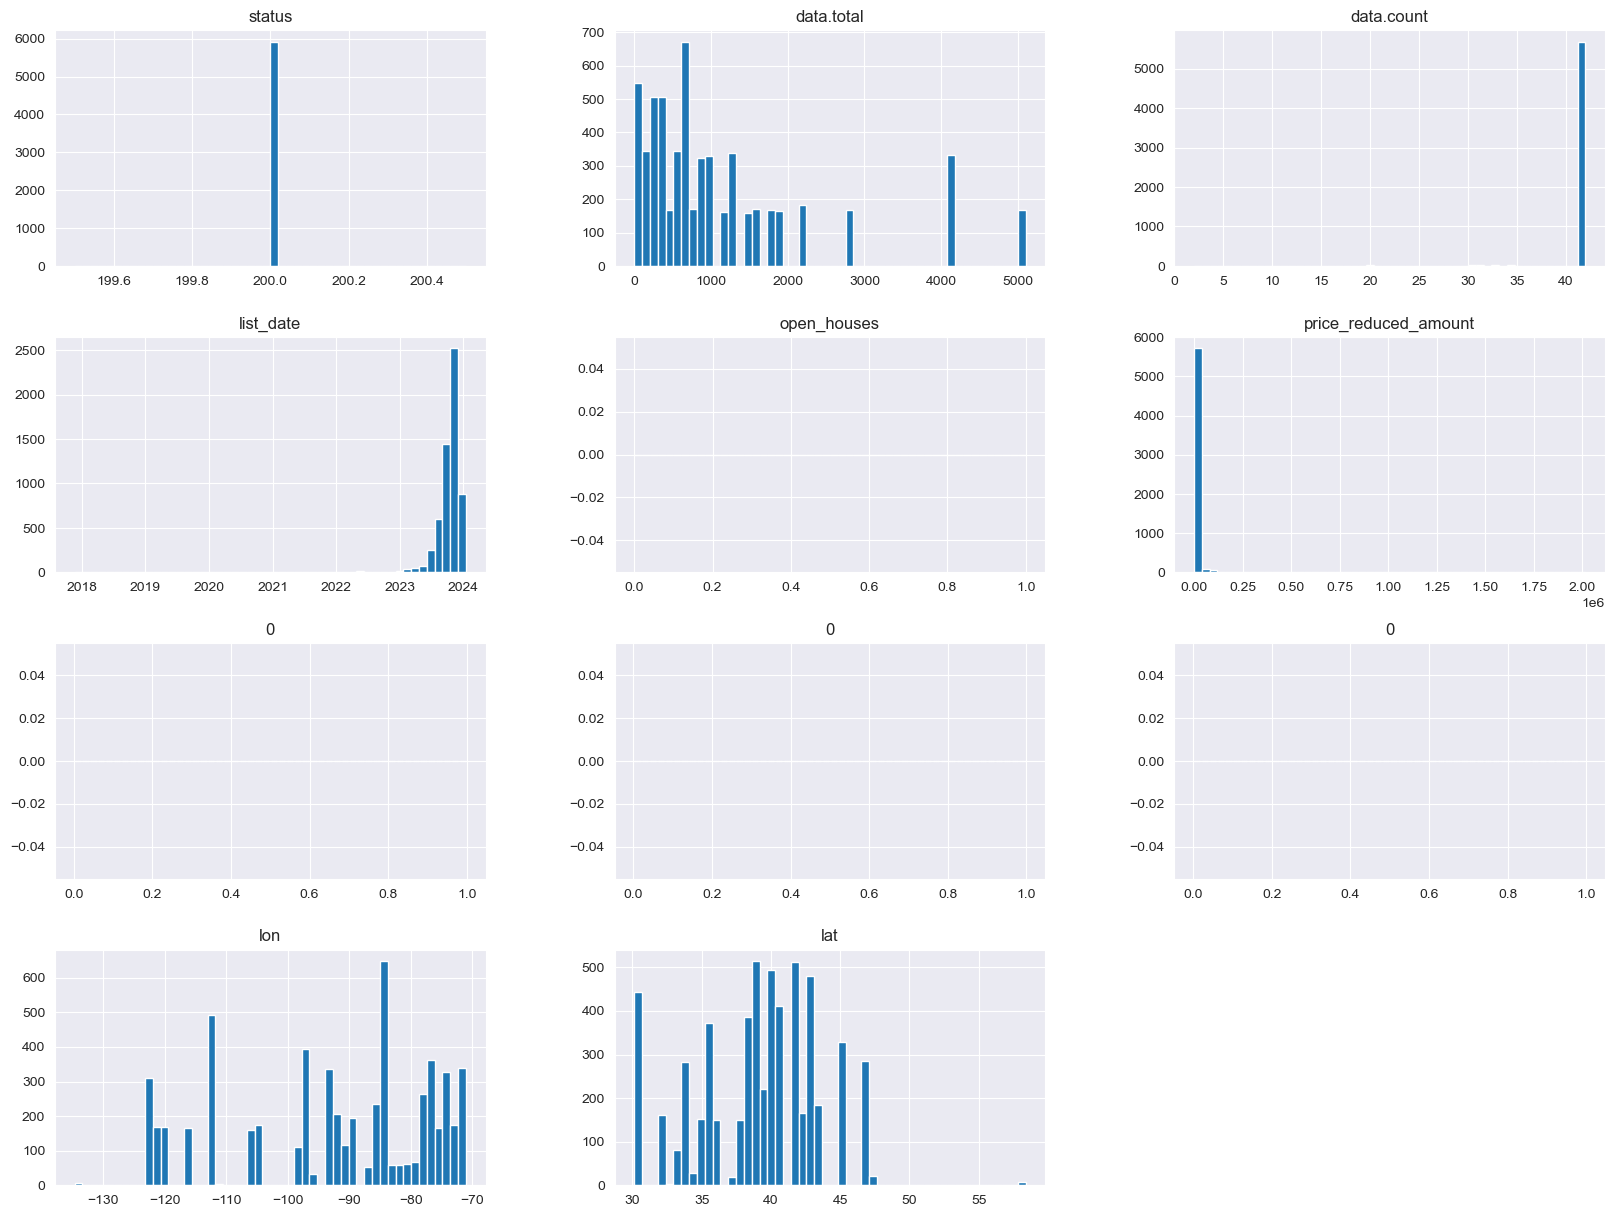

In [70]:
# Histograms for each numerical variable
X_train.hist(bins=50, figsize=(20, 15))

In [71]:
#identifying column names
print(X_train.dtypes)

status                            int64
data.total                        int64
data.count                        int64
primary_photo                    object
last_update_date                 object
source                           object
tags                             object
permalink                        object
status                           object
list_date                datetime64[ns]
open_houses                     float64
description                      object
branding                         object
lead_attributes                  object
property_id                      object
photos                           object
flags                            object
community                        object
products                         object
virtual_tours                    object
other_listings                   object
listing_id                       object
price_reduced_amount            float64
matterport                       object
0                               float64


In [77]:
#first square bracket means I want to create condition, second square bracket indicates exact conditions I want ot see

X_train_merged[['Mortgage_Rate', 'price_reduced_amount']]

,Mortgage_Rate,price_reduced_amount
0,3.92,50000.0
1,3.92,50000.0
2,3.92,50000.0
3,2.80,0.0
4,2.80,0.0
...,...,...
5921,2.80,0.0
5922,2.80,0.0
5923,2.80,0.0
5924,2.80,0.0


In [ ]:
print(type(X_train['city'].iloc[0]))
print(type(X_train['price_reduced_amount'].iloc[0]))

In [ ]:
print(X_train['county'].isnull().values.any())
print(X_train['price_reduced_amount'].isnull().values.any())

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [83]:
# Specify the path 
file_path = "/Users/jorgen/Documents/LHL/Supervised-Learning-main/processed/processed.csv"

# Check if the directory exists, and create it if it does not
directory = "/Users/jorgen/Documents/LHL/Supervised-Learning-main/processed"
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the merged DataFrame to a CSV file at the specified path
X_train_merged.to_csv(file_path, index=False)